In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def drop_columns(df, regex):
    return df.drop(columns=df.filter(regex=regex))

In [4]:
region = 'sr_wm_ref'
omit_extra_vars = False

In [5]:
rec_df = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/recovery-sleep-first2h.csv')).replace({'recovery-sleep-first2h': 'recovery'})
#dep_df = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/extended-wake-last2h.csv')).replace({'extended-wake-last2h': 'deprivation'})
dep_df = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/extended-wake.csv')).replace({'extended-wake': 'deprivation'})

In [6]:
if omit_extra_vars:
    rec_df = drop_columns(rec_df, 'theta|gamma')
    dep_df = drop_columns(dep_df, 'gamma')

In [7]:
df = pd.concat([rec_df, dep_df])
df = df.set_index('region').xs(region)
df = df.pivot(index='subject', columns='condition')
df.columns = df.columns.to_flat_index()
df = df.dropna(axis=1)
df

,"(mean_delta, deprivation)","(mean_delta, recovery)","(total_delta, deprivation)","(total_delta, recovery)","(mean_theta, deprivation)","(mean_theta, recovery)","(total_theta, deprivation)","(total_theta, recovery)","(mean_fast_gamma, deprivation)","(mean_fast_gamma, recovery)","(total_fast_gamma, deprivation)","(total_fast_gamma, recovery)"
subject,,,,,,,,,,,,
Alessandro,40.405732,131.679105,275203.440028,301150.114208,65.492447,121.074745,446069.058818,276897.942441,112.180162,105.486524,764059.083918,241247.681392
Allan,66.294879,128.911270,421038.778930,306937.733438,65.816551,110.326613,418000.914905,262687.666402,92.041842,100.122499,584557.737145,238391.670955
Doppio,61.237894,142.960982,440667.888534,340961.941894,71.918906,113.092677,517528.445185,269726.034474,108.963684,109.073208,784102.671551,260139.601535
Segundo,47.276297,131.446795,323275.321780,309557.201394,73.695887,117.897366,503932.473054,277648.295995,110.483065,111.144524,755483.199141,261745.352985
Valentino,56.434798,135.306230,405822.629294,323923.115723,63.527009,113.079275,456822.718924,270711.784431,79.511633,116.970829,571768.154000,280028.164807


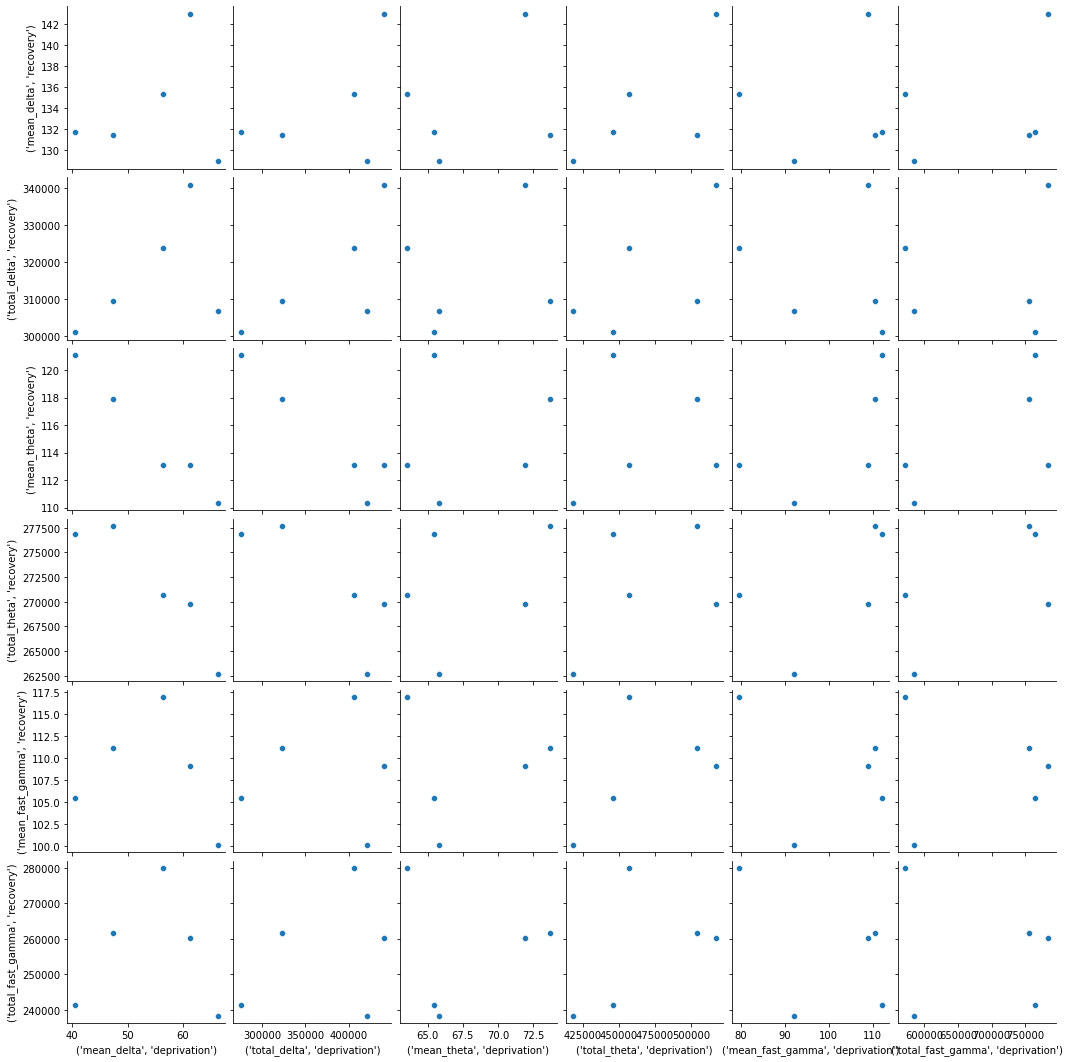

In [8]:
x_vars = [col for col in df.columns if 'deprivation' in col[1]]
y_vars = [col for col in df.columns if 'recovery' in col[1]]

g = sns.pairplot(df, x_vars=x_vars, y_vars=y_vars, diag_kind=None)

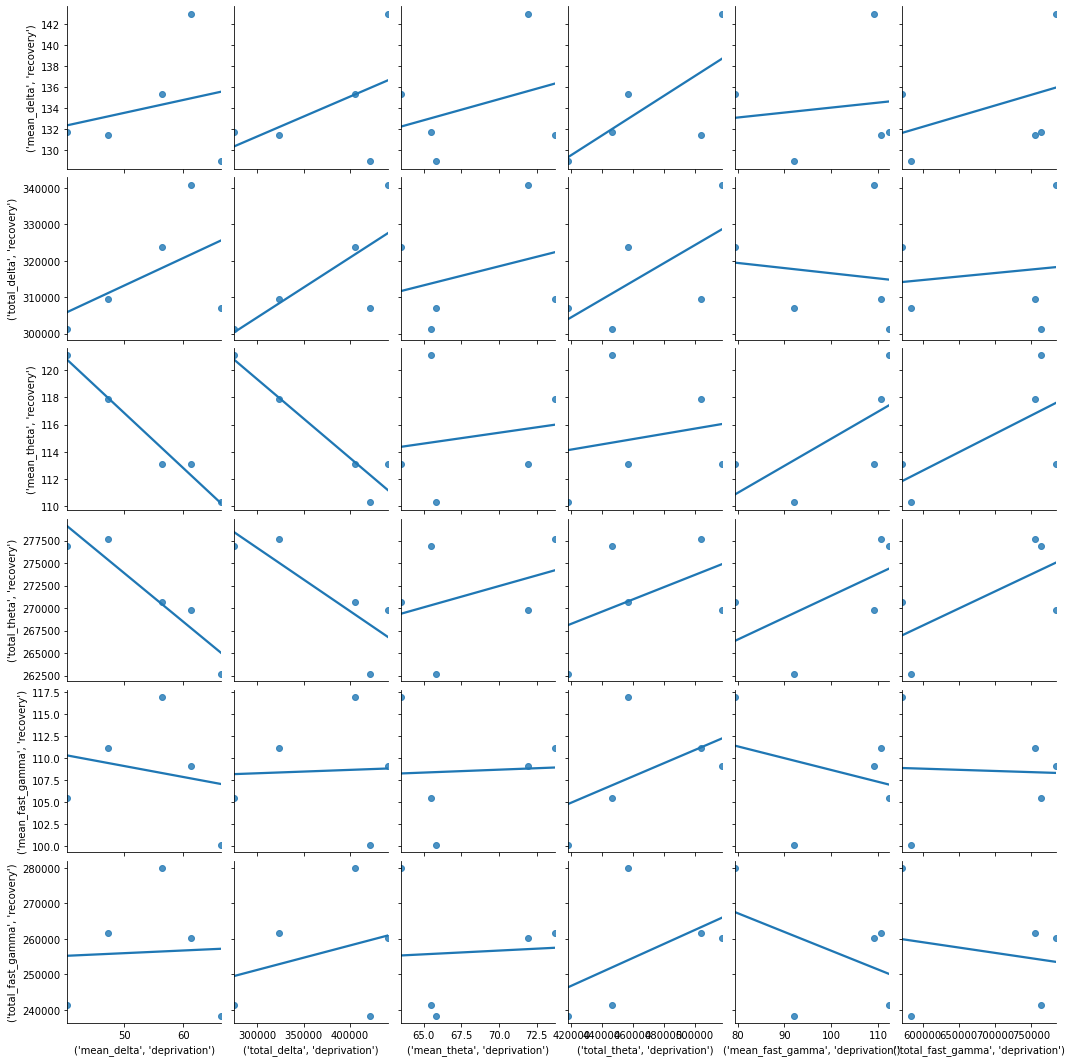

In [9]:
sns.pairplot(df, x_vars=x_vars, y_vars=y_vars, diag_kind=None, kind='reg', plot_kws=dict(ci=None))

In [10]:
corr = df.corr(method='pearson')
corr = corr.reindex(index=pd.MultiIndex.from_tuples(corr.index), columns=pd.MultiIndex.from_tuples(corr.columns))
corr = corr.filter(regex='deprivation', axis=1).filter(regex='recovery', axis=0)
corr

,,mean_delta,total_delta,mean_theta,total_theta,mean_fast_gamma,total_fast_gamma
,,deprivation,deprivation,deprivation,deprivation,deprivation,deprivation
mean_delta,recovery,0.235893,0.490141,0.325563,0.709530,0.123919,0.387092
total_delta,recovery,0.495399,0.724416,0.289652,0.638130,-0.126851,0.125431
mean_theta,recovery,-0.985720,-0.946596,0.163843,0.183953,0.662037,0.653767
total_theta,recovery,-0.932179,-0.814423,0.344776,0.460328,0.574869,0.650919
mean_fast_gamma,recovery,-0.209165,0.043567,0.046913,0.493173,-0.307896,-0.043655
total_fast_gamma,recovery,0.046884,0.287083,0.055583,0.478667,-0.447649,-0.184981


[Text(0.5, 1.0, 'Pearson correlation coefficients'),
 Text(0.5, 14.09375, ''),
 Text(32.09374999999999, 0.5, '')]

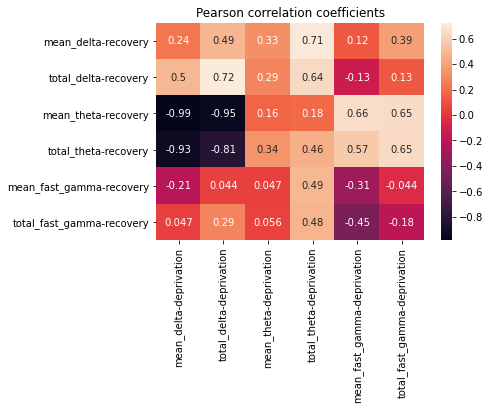

In [11]:
g = sns.heatmap(corr, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set(title='Pearson correlation coefficients', xlabel=None, ylabel=None)